In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


In [ ]:
# !pip install scipy numpy matplotlib

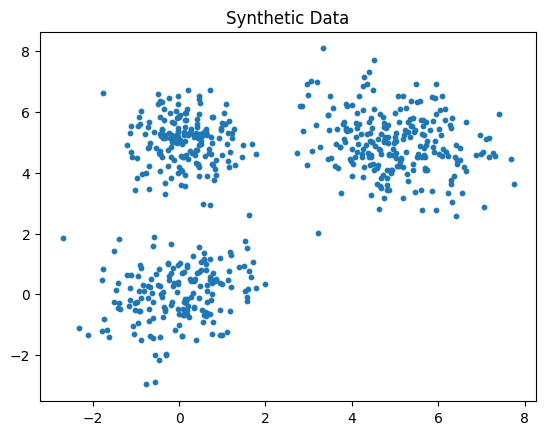

In [13]:
np.random.seed(42)

n_samples = 600

X = np.vstack([
    np.random.multivariate_normal([0, 0], [[1, 0.3], [0.3, 1]], 180),
    np.random.multivariate_normal([5, 5], [[1, -0.2], [-0.2, 1]], 240),
    np.random.multivariate_normal([0, 5], [[0.5, 0], [0, 0.5]], 180),
])

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Synthetic Data")
plt.show()


In [14]:
gmm = GaussianMixture(
    n_components=3,
    covariance_type="full",
    n_init=10,
    random_state=42
)

gmm.fit(X)


,n_components,3
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,10
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [15]:
print("Weights:")
print(gmm.weights_)

print("\nMeans:")
print(gmm.means_)

print("\nCovariances:")
for k, cov in enumerate(gmm.covariances_):
    print(f"Component {k}:\n{cov}\n")


Weights:
[0.40091788 0.29902156 0.30006056]

Means:
[[ 4.9980889   4.98691781]
 [ 0.12550064  5.06661691]
 [-0.00514444  0.01655663]]

Covariances:
Component 0:
[[ 1.09033034 -0.23552441]
 [-0.23552441  0.96190177]]

Component 1:
[[ 0.41239574 -0.02158922]
 [-0.02158922  0.57758595]]

Component 2:
[[0.87366107 0.22629699]
 [0.22629699 0.89775595]]



In [16]:
labels = gmm.predict(X)          # hard assignments
responsibilities = gmm.predict_proba(X)  # soft assignments


In [17]:
log_likelihood = gmm.score(X)       # average log-likelihood per sample
total_ll = gmm.score(X) * X.shape[0]

print("Average log-likelihood:", log_likelihood)
print("Total log-likelihood:", total_ll)


Average log-likelihood: -3.6584041904153732
Total log-likelihood: -2195.042514249224


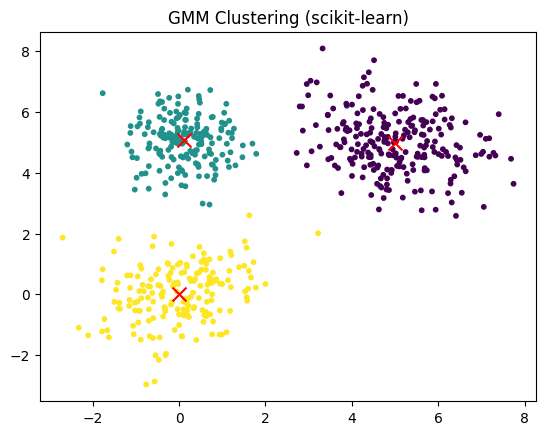

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=10)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1],
            c="red", marker="x", s=100)
plt.title("GMM Clustering (scikit-learn)")
plt.show()


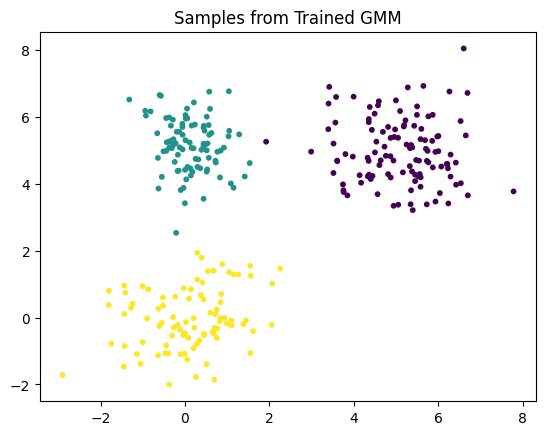

In [19]:
X_sampled, y_sampled = gmm.sample(300)

plt.scatter(X_sampled[:, 0], X_sampled[:, 1], c=y_sampled,
            cmap="viridis", s=10)
plt.title("Samples from Trained GMM")
plt.show()
